# Part 2: Full Data Workflow A-Z

## Cleaning Data

### First Inspection / Handling inconsistent Data 

In [1]:
import pandas as pd

#### Titanic Dataset

In [2]:
titanic = pd.read_csv("titanic_imp.csv")

In [10]:
titanic.head()

Survived  Class  Gender   Age  SipSp  ParCh      Fare Emb Deck
0        0      3    male  22.0      1      0     $7.25   S  NaN
1        1      1  female  38.0      1      0  $71.2833   C    C
2        1      3  female  26.0      0      0    $7.925   S  NaN
3        1      1  female  35.0      1      0     $53.1   S    C
4        0      3    male  35.0      0      0     $8.05   S  NaN

In [11]:
titanic.tail()

Survived  Class Gender   Age  SipSp  ParCh     Fare Emb Deck
889        1      1   male  26.0      0      0    $30.0   C    C
890        0      3   male  32.0      0      0    $7.75   Q  NaN
891        0      2   male  24.0      0      0    $10.5   S  NaN
892        0      3   male  34.0      1      1    $14.4   S  NaN
893        0      3   male  36.0      0      0  $7.8958   S  NaN

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [13]:
titanic.describe()

Class       SipSp       ParCh
count  894.000000  894.000000  894.000000
mean     2.309843    0.522371    0.381432
std      0.835370    1.101283    0.805171
min      1.000000    0.000000    0.000000
25%      2.000000    0.000000    0.000000
50%      3.000000    0.000000    0.000000
75%      3.000000    1.000000    0.000000
max      3.000000    8.000000    6.000000

In [14]:
titanic.describe(include ="O")

Survived Gender           Age   Fare  Emb Deck
count       894    894           758    894  892  203
unique        4      2            92    248    3    7
top           0   male  Missing Data  $8.05    S    C
freq        551    580            41     43  647   59

In [15]:
titanic.Survived.unique()

array(['0', '1', 'yes', 'no'], dtype=object)

In [16]:
titanic.Survived.value_counts()

0      551
1      341
no       1
yes      1
Name: Survived, dtype: int64

In [17]:
titanic.Survived.replace(to_replace= ["yes", "no"], value = [1, 0], inplace = True)

In [18]:
titanic.Survived.value_counts()

0    551
1    341
1      1
0      1
Name: Survived, dtype: int64

#### Olympic Dataset

In [19]:
summer = pd.read_csv("summer_imp.csv")

In [20]:
summer.head()

Year    City     Sport Discipline          Athlete Name Country Gender  \
0  1896  Athens  Aquatics   Swimming        HAJOS, Alfred      HUN    Men   
1  1896  Athens  Aquatics   Swimming     HERSCHMANN, Otto      AUT    Men   
2  1896  Athens  Aquatics   Swimming    DRIVAS, Dimitrios      GRE    Men   
3  1896  Athens  Aquatics   Swimming   Malokinis, Ioannis      GRE    Men   
4  1896  Athens  Aquatics   Swimming   Chasapis, Spiridon      GRE    Men   

                        Event       Medal  
0              100M Freestyle  Gold Medal  
1              100M Freestyle      Silver  
2  100M Freestyle For Sailors      Bronze  
3  100M Freestyle For Sailors  Gold Medal  
4  100M Freestyle For Sailors      Silver

In [21]:
summer.tail()

Year    City      Sport           Discipline  \
31165  2012  London  Wrestling  Wrestling Freestyle   
31166  2012  London  Wrestling  Wrestling Freestyle   
31167  2012  London  Wrestling  Wrestling Freestyle   
31168  2012  London  Wrestling  Wrestling Freestyle   
31169  2012  London  Wrestling  Wrestling Freestyle   

                      Athlete Name Country Gender     Event   Medal  
31165          JANIKOWSKI, Damian      POL    Men  Wg 84 KG  Bronze  
31166   REZAEI, Ghasem Gholamreza      IRI    Men  Wg 96 KG    Gold  
31167              TOTROV, Rustam      RUS    Men  Wg 96 KG  Silver  
31168           ALEKSANYAN, Artur      ARM    Men  Wg 96 KG  Bronze  
31169              LIDBERG, Jimmy      SWE    Men  Wg 96 KG  Bronze

In [22]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [23]:
#summer.Athlete_Name - bad idea to use column names with whitespaces

In [24]:
summer.rename(columns = {"Athlete Name": "Athlete_Name"}, inplace = True)

In [25]:
summer.head(20)

Year    City      Sport Discipline             Athlete_Name Country  \
0   1896  Athens   Aquatics   Swimming           HAJOS, Alfred      HUN   
1   1896  Athens   Aquatics   Swimming        HERSCHMANN, Otto      AUT   
2   1896  Athens   Aquatics   Swimming       DRIVAS, Dimitrios      GRE   
3   1896  Athens   Aquatics   Swimming      Malokinis, Ioannis      GRE   
4   1896  Athens   Aquatics   Swimming      Chasapis, Spiridon      GRE   
5   1896  Athens   Aquatics   Swimming   Chorophas, Efstathios      GRE   
6   1896  Athens   Aquatics   Swimming           Hajos, Alfred      HUN   
7   1896  Athens   Aquatics   Swimming        Andreou, Joannis      GRE   
8   1896  Athens   Aquatics   Swimming   Chorophas, Efstathios      GRE   
9   1896  Athens   Aquatics   Swimming           Neumann, Paul      AUT   
10  1896  Athens   Aquatics   Swimming       Pepanos, Antonios      GRE   
11  1896  Athens  Athletics  Athletics           Lane, Francis      USA   
12  1896  Athens  Athletics  Athletics        Szokolyi, Alajos      HUN   
13  1896  Athens  Athletics  Athletics           BURKE, Thomas      USA   
14  1896  Athens  Athletics  Athletics          HOFMANN, Fritz      GER   
15  1896  Athens  Athletics  Athletics          CURTIS, Thomas      USA   
16  1896  Athens  Athletics  Athletics      GOULDING, Grantley      GBR   
17  1896  Athens  Athletics  Athletics       LERMUSIAUX, Albin      FRA   
18  1896  Athens  Athletics  Athletics            FLACK, Edwin      AUS   
19  1896  Athens  Athletics  Athletics           BLAKE, Arthur      USA   

   Gender                       Event       Medal  
0     Men              100M Freestyle  Gold Medal  
1     Men              100M Freestyle      Silver  
2     Men  100M Freestyle For Sailors      Bronze  
3     Men  100M Freestyle For Sailors  Gold Medal  
4     Men  100M Freestyle For Sailors      Silver  
5     Men             1200M Freestyle      Bronze  
6     Men             1200M Freestyle  Gold Medal  
7     Men             1200M Freestyle      Silver  
8     Men              400M Freestyle      Bronze  
9     Men              400M Freestyle  Gold Medal  
10    Men              400M Freestyle      Silver  
11    Men                        100M      Bronze  
12    Men                        100M      Bronze  
13    Men                        100M        Gold  
14    Men                        100M      Silver  
15    Men                110M Hurdles        Gold  
16    Men                110M Hurdles      Silver  
17    Men                       1500M      Bronze  
18    Men                       1500M        Gold  
19    Men                       1500M      Silver

In [26]:
summer.Medal.value_counts()

Gold          10483
Bronze        10372
Silver        10311
Gold Medal        4
Name: Medal, dtype: int64

In [27]:
summer.Medal.replace(to_replace= "Gold Medal", value = "Gold", inplace = True)

In [28]:
summer.describe(include = "O")

City     Sport Discipline       Athlete_Name Country Gender  \
count    31170     31170      31170              31170   31166  31170   
unique      22        43         67              22763     147      2   
top     London  Aquatics  Athletics   PHELPS, Michael      USA    Men   
freq      3567      4170       3639                 22    4586  22751   

           Event  Medal  
count      31170  31170  
unique       666      3  
top     Football   Gold  
freq        1497  10487

### String Operations

#### Titanic Dataset

In [29]:
titanic.head()

Survived  Class  Gender   Age  SipSp  ParCh      Fare Emb Deck
0        0      3    male  22.0      1      0     $7.25   S  NaN
1        1      1  female  38.0      1      0  $71.2833   C    C
2        1      3  female  26.0      0      0    $7.925   S  NaN
3        1      1  female  35.0      1      0     $53.1   S    C
4        0      3    male  35.0      0      0     $8.05   S  NaN

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [31]:
pd.to_numeric(titanic.Fare)

ValueError: Unable to parse string "$7.25" at position 0

In [32]:
titanic.Fare = titanic.Fare.str.replace("$", "")

In [33]:
titanic.Fare.head()

0       7.25
1    71.2833
2      7.925
3       53.1
4       8.05
Name: Fare, dtype: object

#### Olympic Dataset

In [34]:
summer.head(20)

Year    City      Sport Discipline             Athlete_Name Country  \
0   1896  Athens   Aquatics   Swimming           HAJOS, Alfred      HUN   
1   1896  Athens   Aquatics   Swimming        HERSCHMANN, Otto      AUT   
2   1896  Athens   Aquatics   Swimming       DRIVAS, Dimitrios      GRE   
3   1896  Athens   Aquatics   Swimming      Malokinis, Ioannis      GRE   
4   1896  Athens   Aquatics   Swimming      Chasapis, Spiridon      GRE   
5   1896  Athens   Aquatics   Swimming   Chorophas, Efstathios      GRE   
6   1896  Athens   Aquatics   Swimming           Hajos, Alfred      HUN   
7   1896  Athens   Aquatics   Swimming        Andreou, Joannis      GRE   
8   1896  Athens   Aquatics   Swimming   Chorophas, Efstathios      GRE   
9   1896  Athens   Aquatics   Swimming           Neumann, Paul      AUT   
10  1896  Athens   Aquatics   Swimming       Pepanos, Antonios      GRE   
11  1896  Athens  Athletics  Athletics           Lane, Francis      USA   
12  1896  Athens  Athletics  Athletics        Szokolyi, Alajos      HUN   
13  1896  Athens  Athletics  Athletics           BURKE, Thomas      USA   
14  1896  Athens  Athletics  Athletics          HOFMANN, Fritz      GER   
15  1896  Athens  Athletics  Athletics          CURTIS, Thomas      USA   
16  1896  Athens  Athletics  Athletics      GOULDING, Grantley      GBR   
17  1896  Athens  Athletics  Athletics       LERMUSIAUX, Albin      FRA   
18  1896  Athens  Athletics  Athletics            FLACK, Edwin      AUS   
19  1896  Athens  Athletics  Athletics           BLAKE, Arthur      USA   

   Gender                       Event   Medal  
0     Men              100M Freestyle    Gold  
1     Men              100M Freestyle  Silver  
2     Men  100M Freestyle For Sailors  Bronze  
3     Men  100M Freestyle For Sailors    Gold  
4     Men  100M Freestyle For Sailors  Silver  
5     Men             1200M Freestyle  Bronze  
6     Men             1200M Freestyle    Gold  
7     Men             1200M Freestyle  Silver  
8     Men              400M Freestyle  Bronze  
9     Men              400M Freestyle    Gold  
10    Men              400M Freestyle  Silver  
11    Men                        100M  Bronze  
12    Men                        100M  Bronze  
13    Men                        100M    Gold  
14    Men                        100M  Silver  
15    Men                110M Hurdles    Gold  
16    Men                110M Hurdles  Silver  
17    Men                       1500M  Bronze  
18    Men                       1500M    Gold  
19    Men                       1500M  Silver

In [35]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete_Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [36]:
summer.Athlete_Name = summer.Athlete_Name.str.title()

In [37]:
summer.head(10)

Year    City     Sport Discipline             Athlete_Name Country Gender  \
0  1896  Athens  Aquatics   Swimming           Hajos, Alfred      HUN    Men   
1  1896  Athens  Aquatics   Swimming        Herschmann, Otto      AUT    Men   
2  1896  Athens  Aquatics   Swimming       Drivas, Dimitrios      GRE    Men   
3  1896  Athens  Aquatics   Swimming      Malokinis, Ioannis      GRE    Men   
4  1896  Athens  Aquatics   Swimming      Chasapis, Spiridon      GRE    Men   
5  1896  Athens  Aquatics   Swimming   Chorophas, Efstathios      GRE    Men   
6  1896  Athens  Aquatics   Swimming           Hajos, Alfred      HUN    Men   
7  1896  Athens  Aquatics   Swimming        Andreou, Joannis      GRE    Men   
8  1896  Athens  Aquatics   Swimming   Chorophas, Efstathios      GRE    Men   
9  1896  Athens  Aquatics   Swimming           Neumann, Paul      AUT    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver  
5             1200M Freestyle  Bronze  
6             1200M Freestyle    Gold  
7             1200M Freestyle  Silver  
8              400M Freestyle  Bronze  
9              400M Freestyle    Gold

In [38]:
summer.loc[summer.Athlete_Name.str.contains("Hajos")] # contains avoids errors due to unknown whitespaces, for example

Year    City     Sport Discipline     Athlete_Name Country Gender  \
0  1896  Athens  Aquatics   Swimming   Hajos, Alfred      HUN    Men   
6  1896  Athens  Aquatics   Swimming   Hajos, Alfred      HUN    Men   

             Event Medal  
0   100M Freestyle  Gold  
6  1200M Freestyle  Gold

In [39]:
summer.iloc[0, 4]

' Hajos, Alfred '

In [40]:
summer.Athlete_Name = summer.Athlete_Name.str.strip()

In [41]:
summer.loc[summer.Athlete_Name == "Hajos, Alfred"]

Year    City     Sport Discipline   Athlete_Name Country Gender  \
0  1896  Athens  Aquatics   Swimming  Hajos, Alfred     HUN    Men   
6  1896  Athens  Aquatics   Swimming  Hajos, Alfred     HUN    Men   

             Event Medal  
0   100M Freestyle  Gold  
6  1200M Freestyle  Gold

In [42]:
summer.loc[summer.Athlete_Name == "Phelps, Michael"]

Year     City     Sport Discipline     Athlete_Name Country Gender  \
25229  2004   Athens  Aquatics   Swimming  Phelps, Michael     USA    Men   
25257  2004   Athens  Aquatics   Swimming  Phelps, Michael     USA    Men   
25262  2004   Athens  Aquatics   Swimming  Phelps, Michael     USA    Men   
25269  2004   Athens  Aquatics   Swimming  Phelps, Michael     USA    Men   
25281  2004   Athens  Aquatics   Swimming  Phelps, Michael     USA    Men   
25290  2004   Athens  Aquatics   Swimming  Phelps, Michael     USA    Men   
25329  2004   Athens  Aquatics   Swimming  Phelps, Michael     USA    Men   
25365  2004   Athens  Aquatics   Swimming  Phelps, Michael     USA    Men   
27228  2008  Beijing  Aquatics   Swimming  Phelps, Michael     USA    Men   
27256  2008  Beijing  Aquatics   Swimming  Phelps, Michael     USA    Men   
27262  2008  Beijing  Aquatics   Swimming  Phelps, Michael     USA    Men   
27268  2008  Beijing  Aquatics   Swimming  Phelps, Michael     USA    Men   
27280  2008  Beijing  Aquatics   Swimming  Phelps, Michael     USA    Men   
27295  2008  Beijing  Aquatics   Swimming  Phelps, Michael     USA    Men   
27331  2008  Beijing  Aquatics   Swimming  Phelps, Michael     USA    Men   
27370  2008  Beijing  Aquatics   Swimming  Phelps, Michael     USA    Men   
29275  2012   London  Aquatics   Swimming  Phelps, Michael     USA    Men   
29303  2012   London  Aquatics   Swimming  Phelps, Michael     USA    Men   
29314  2012   London  Aquatics   Swimming  Phelps, Michael     USA    Men   
29345  2012   London  Aquatics   Swimming  Phelps, Michael     USA    Men   
29375  2012   London  Aquatics   Swimming  Phelps, Michael     USA    Men   
29410  2012   London  Aquatics   Swimming  Phelps, Michael     USA    Men   

                        Event   Medal  
25229          100M Butterfly    Gold  
25257          200M Butterfly    Gold  
25262          200M Freestyle  Bronze  
25269  200M Individual Medley    Gold  
25281  400M Individual Medley    Gold  
25290  4X100M Freestyle Relay  Bronze  
25329     4X100M Medley Relay    Gold  
25365  4X200M Freestyle Relay    Gold  
27228          100M Butterfly    Gold  
27256          200M Butterfly    Gold  
27262          200M Freestyle    Gold  
27268  200M Individual Medley    Gold  
27280  400M Individual Medley    Gold  
27295  4X100M Freestyle Relay    Gold  
27331     4X100M Medley Relay    Gold  
27370  4X200M Freestyle Relay    Gold  
29275          100M Butterfly    Gold  
29303          200M Butterfly  Silver  
29314             200M Medley    Gold  
29345        4X100M Freestyle  Silver  
29375           4X100M Medley    Gold  
29410        4X200M Freestyle    Gold

### Changing DataType with astype() / pd.to_numeric

#### Titanic Dataset

In [43]:
titanic.head()

Survived  Class  Gender   Age  SipSp  ParCh     Fare Emb Deck
0        0      3    male  22.0      1      0     7.25   S  NaN
1        1      1  female  38.0      1      0  71.2833   C    C
2        1      3  female  26.0      0      0    7.925   S  NaN
3        1      1  female  35.0      1      0     53.1   S    C
4        0      3    male  35.0      0      0     8.05   S  NaN

In [44]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [45]:
pd.to_numeric(titanic.Fare)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
889    30.0000
890     7.7500
891    10.5000
892    14.4000
893     7.8958
Name: Fare, Length: 894, dtype: float64

In [46]:
titanic.Fare.astype("float")

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
889    30.0000
890     7.7500
891    10.5000
892    14.4000
893     7.8958
Name: Fare, Length: 894, dtype: float64

In [47]:
titanic["Fare"] = titanic.Fare.astype("float")

In [48]:
titanic["Survived"] = titanic.Survived.astype("int")

In [49]:
#titanic["Age"] = titanic.Age.astype("float")

In [50]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       758 non-null    object 
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 59.5+ KB


In [51]:
titanic.head()

Survived  Class  Gender   Age  SipSp  ParCh     Fare Emb Deck
0         0      3    male  22.0      1      0   7.2500   S  NaN
1         1      1  female  38.0      1      0  71.2833   C    C
2         1      3  female  26.0      0      0   7.9250   S  NaN
3         1      1  female  35.0      1      0  53.1000   S    C
4         0      3    male  35.0      0      0   8.0500   S  NaN

#### Olympic Dataset

In [52]:
summer.head()

Year    City     Sport Discipline        Athlete_Name Country Gender  \
0  1896  Athens  Aquatics   Swimming       Hajos, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    Herschmann, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   Drivas, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  Malokinis, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  Chasapis, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver

In [53]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete_Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


### Intro to NA Values

In [54]:
import numpy as np

In [68]:
sales = pd.read_csv("sales.csv", index_col = 0)

In [69]:
sales

Mon  Tue  Wed      Thu   Fri
Steven   34   27   15            NaN
Mike     45    9   74       87  12.0
Andi     17   33   54        8  29.0
Paul     87   67   27  no data   7.0

In [70]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mon     4 non-null      int64  
 1   Tue     4 non-null      int64  
 2   Wed     4 non-null      int64  
 3   Thu     4 non-null      object 
 4   Fri     3 non-null      float64
dtypes: float64(1), int64(3), object(1)
memory usage: 192.0+ bytes


In [67]:
sales.loc["Steven", "Thu"]

' '

In [59]:
sales.iloc[1,1] = None

In [60]:
sales

Mon   Tue  Wed   Thu  Fri
Steven   34  27.0   15   NaN   33
Mike     45   NaN   74  87.0   12
Andi     17  33.0   54   8.0   29
Paul     87  67.0   27  45.0    7

In [61]:
sales.iloc[2,2] = np.nan

In [62]:
sales

Mon   Tue   Wed   Thu  Fri
Steven   34  27.0  15.0   NaN   33
Mike     45   NaN  74.0  87.0   12
Andi     17  33.0   NaN   8.0   29
Paul     87  67.0  27.0  45.0    7

In [63]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mon     4 non-null      int64  
 1   Tue     3 non-null      float64
 2   Wed     3 non-null      float64
 3   Thu     3 non-null      float64
 4   Fri     4 non-null      int64  
dtypes: float64(3), int64(2)
memory usage: 352.0+ bytes


#### Titanic Dataset

In [71]:
titanic.head(10)

Survived  Class  Gender           Age  SipSp  ParCh     Fare Emb Deck
0         0      3    male          22.0      1      0   7.2500   S  NaN
1         1      1  female          38.0      1      0  71.2833   C    C
2         1      3  female          26.0      0      0   7.9250   S  NaN
3         1      1  female          35.0      1      0  53.1000   S    C
4         0      3    male          35.0      0      0   8.0500   S  NaN
5         0      3    male  Missing Data      0      0   8.4583   Q  NaN
6         0      1    male          54.0      0      0  51.8625   S    E
7         0      3    male           2.0      3      1  21.0750   S  NaN
8         1      3  female          27.0      0      2  11.1333   S  NaN
9         1      2  female          14.0      1      0  30.0708   C  NaN

In [72]:
titanic.tail(10)

Survived  Class  Gender   Age  SipSp  ParCh     Fare Emb Deck
884         0      3    male  25.0      0      0   7.0500   S  NaN
885         0      3  female  39.0      0      5  29.1250   Q  NaN
886         0      2    male  27.0      0      0  13.0000   S  NaN
887         1      1  female  19.0      0      0  30.0000   S    B
888         0      3  female   NaN      1      2  23.4500   S  NaN
889         1      1    male  26.0      0      0  30.0000   C    C
890         0      3    male  32.0      0      0   7.7500   Q  NaN
891         0      2    male  24.0      0      0  10.5000   S  NaN
892         0      3    male  34.0      1      1  14.4000   S  NaN
893         0      3    male  36.0      0      0   7.8958   S  NaN

In [73]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       758 non-null    object 
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 59.5+ KB


In [74]:
titanic.isna()

Survived  Class  Gender    Age  SipSp  ParCh   Fare    Emb   Deck
0       False  False   False  False  False  False  False  False   True
1       False  False   False  False  False  False  False  False  False
2       False  False   False  False  False  False  False  False   True
3       False  False   False  False  False  False  False  False  False
4       False  False   False  False  False  False  False  False   True
..        ...    ...     ...    ...    ...    ...    ...    ...    ...
889     False  False   False  False  False  False  False  False  False
890     False  False   False  False  False  False  False  False   True
891     False  False   False  False  False  False  False  False   True
892     False  False   False  False  False  False  False  False   True
893     False  False   False  False  False  False  False  False   True

[894 rows x 9 columns]

In [75]:
titanic.isna().sum(axis = 0)

Survived      0
Class         0
Gender        0
Age         136
SipSp         0
ParCh         0
Fare          0
Emb           2
Deck        691
dtype: int64

In [76]:
titanic.isna().any(axis = 1)

0       True
1      False
2       True
3      False
4       True
       ...  
889    False
890     True
891     True
892     True
893     True
Length: 894, dtype: bool

In [78]:
titanic[titanic.isna().any(axis = 1)]

Survived  Class  Gender           Age  SipSp  ParCh     Fare Emb Deck
0           0      3    male          22.0      1      0   7.2500   S  NaN
2           1      3  female          26.0      0      0   7.9250   S  NaN
4           0      3    male          35.0      0      0   8.0500   S  NaN
5           0      3    male  Missing Data      0      0   8.4583   Q  NaN
7           0      3    male           2.0      3      1  21.0750   S  NaN
..        ...    ...     ...           ...    ...    ...      ...  ..  ...
888         0      3  female           NaN      1      2  23.4500   S  NaN
890         0      3    male          32.0      0      0   7.7500   Q  NaN
891         0      2    male          24.0      0      0  10.5000   S  NaN
892         0      3    male          34.0      1      1  14.4000   S  NaN
893         0      3    male          36.0      0      0   7.8958   S  NaN

[707 rows x 9 columns]

In [79]:
titanic.notna()

Survived  Class  Gender   Age  SipSp  ParCh  Fare   Emb   Deck
0        True   True    True  True   True   True  True  True  False
1        True   True    True  True   True   True  True  True   True
2        True   True    True  True   True   True  True  True  False
3        True   True    True  True   True   True  True  True   True
4        True   True    True  True   True   True  True  True  False
..        ...    ...     ...   ...    ...    ...   ...   ...    ...
889      True   True    True  True   True   True  True  True   True
890      True   True    True  True   True   True  True  True  False
891      True   True    True  True   True   True  True  True  False
892      True   True    True  True   True   True  True  True  False
893      True   True    True  True   True   True  True  True  False

[894 rows x 9 columns]

In [80]:
titanic.notna().sum(axis = 1)

0      8
1      9
2      8
3      9
4      8
      ..
889    9
890    8
891    8
892    8
893    8
Length: 894, dtype: int64

In [81]:
titanic.notna().all(axis = 0)

Survived     True
Class        True
Gender       True
Age         False
SipSp        True
ParCh        True
Fare         True
Emb         False
Deck        False
dtype: bool

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

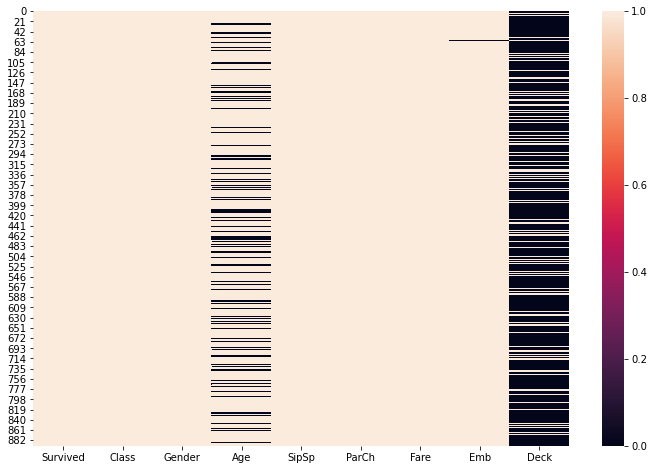

In [88]:
plt.figure(figsize = (12,8))
sns.heatmap(titanic.notna())
plt.show()

In [84]:
titanic.Age.value_counts(dropna = False)

NaN             136
Missing Data     41
24.0             31
22.0             27
18.0             26
               ... 
74.0              1
53.0              1
20.5              1
55.5              1
0.67              1
Name: Age, Length: 93, dtype: int64

In [85]:
titanic.Age.replace(to_replace= "Missing Data", value = np.nan, inplace= True)

In [89]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       717 non-null    float64
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 59.5+ KB


In [87]:
titanic.Age = titanic.Age.astype("float")

#### Olympic Dataset

In [90]:
summer.head()

Year    City     Sport Discipline        Athlete_Name Country Gender  \
0  1896  Athens  Aquatics   Swimming       Hajos, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    Herschmann, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   Drivas, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  Malokinis, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  Chasapis, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver

In [91]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete_Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [92]:
summer[summer.isna().any(axis = 1)]

Year    City          Sport           Discipline     Athlete_Name  \
29608  2012  London      Athletics            Athletics          Pending   
31077  2012  London  Weightlifting        Weightlifting          Pending   
31096  2012  London  Weightlifting        Weightlifting          Pending   
31115  2012  London      Wrestling  Wrestling Freestyle  Kudukhov, Besik   

      Country Gender     Event   Medal  
29608     NaN  Women     1500M    Gold  
31077     NaN  Women      63KG    Gold  
31096     NaN    Men      94KG  Silver  
31115     NaN    Men  Wf 60 KG  Silver

### Removing Missing Values with dropna()

#### Titanic Dataset

In [93]:
titanic.head()

Survived  Class  Gender   Age  SipSp  ParCh     Fare Emb Deck
0         0      3    male  22.0      1      0   7.2500   S  NaN
1         1      1  female  38.0      1      0  71.2833   C    C
2         1      3  female  26.0      0      0   7.9250   S  NaN
3         1      1  female  35.0      1      0  53.1000   S    C
4         0      3    male  35.0      0      0   8.0500   S  NaN

In [94]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       717 non-null    float64
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 59.5+ KB


In [95]:
titanic[titanic.Emb.isna()]

Survived  Class  Gender   Age  SipSp  ParCh  Fare  Emb Deck
61          1      1  female  38.0      0      0  80.0  NaN    B
829         1      1  female  62.0      0      0  80.0  NaN    B

In [96]:
titanic.Age.value_counts(dropna = False)

NaN       177
24.00      31
22.00      27
18.00      26
30.00      25
         ... 
102.00      1
490.00      1
14.50       1
12.00       1
0.42        1
Name: Age, Length: 92, dtype: int64

In [97]:
titanic.Age.mean(skipna = True)

30.718507670850766

In [98]:
titanic.shape

(894, 9)

In [99]:
titanic.dropna().shape

(182, 9)

In [100]:
titanic.dropna(axis = 0, how = "any").shape

(182, 9)

In [101]:
titanic.dropna(axis = 1, how = "any").shape

(894, 6)

In [102]:
titanic.dropna(axis = 0, how = "all").shape

(894, 9)

In [103]:
titanic.dropna(axis = 1, how = "all").shape

(894, 9)

In [105]:
titanic.dropna(axis = 0, thresh = 8).shape

(736, 9)

In [106]:
titanic.dropna(axis = 1, thresh = 500).shape

(894, 8)

In [107]:
titanic.dropna(axis = 1, thresh = 500, inplace = True)

In [108]:
titanic.head()

Survived  Class  Gender   Age  SipSp  ParCh     Fare Emb
0         0      3    male  22.0      1      0   7.2500   S
1         1      1  female  38.0      1      0  71.2833   C
2         1      3  female  26.0      0      0   7.9250   S
3         1      1  female  35.0      1      0  53.1000   S
4         0      3    male  35.0      0      0   8.0500   S

In [109]:
titanic.shape

(894, 8)

In [110]:
titanic.dropna(axis = 0, subset = ["Survived", "Class", "Gender", "Age"], how = "any").shape

(717, 8)

#### Olympic Dataset

In [111]:
summer.head()

Year    City     Sport Discipline        Athlete_Name Country Gender  \
0  1896  Athens  Aquatics   Swimming       Hajos, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    Herschmann, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   Drivas, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  Malokinis, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  Chasapis, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver

In [112]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete_Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [113]:
summer[summer.isna().any(axis = 1)]

Year    City          Sport           Discipline     Athlete_Name  \
29608  2012  London      Athletics            Athletics          Pending   
31077  2012  London  Weightlifting        Weightlifting          Pending   
31096  2012  London  Weightlifting        Weightlifting          Pending   
31115  2012  London      Wrestling  Wrestling Freestyle  Kudukhov, Besik   

      Country Gender     Event   Medal  
29608     NaN  Women     1500M    Gold  
31077     NaN  Women      63KG    Gold  
31096     NaN    Men      94KG  Silver  
31115     NaN    Men  Wf 60 KG  Silver

In [114]:
summer.dropna(inplace = True)

In [115]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31166 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31166 non-null  int64 
 1   City          31166 non-null  object
 2   Sport         31166 non-null  object
 3   Discipline    31166 non-null  object
 4   Athlete_Name  31166 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31166 non-null  object
 7   Event         31166 non-null  object
 8   Medal         31166 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


### Replacing Missing Values with fillna()

#### Titanic Dataset

In [116]:
titanic.head(10)

Survived  Class  Gender   Age  SipSp  ParCh     Fare Emb
0         0      3    male  22.0      1      0   7.2500   S
1         1      1  female  38.0      1      0  71.2833   C
2         1      3  female  26.0      0      0   7.9250   S
3         1      1  female  35.0      1      0  53.1000   S
4         0      3    male  35.0      0      0   8.0500   S
5         0      3    male   NaN      0      0   8.4583   Q
6         0      1    male  54.0      0      0  51.8625   S
7         0      3    male   2.0      3      1  21.0750   S
8         1      3  female  27.0      0      2  11.1333   S
9         1      2  female  14.0      1      0  30.0708   C

In [117]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       717 non-null    float64
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.5+ KB


In [118]:
titanic.Age.mean()

30.718507670850766

In [119]:
mean = round(titanic.Age.mean(),1)
mean

30.7

In [120]:
titanic.Age.fillna(mean, inplace = True)

In [121]:
titanic.head(6)

Survived  Class  Gender   Age  SipSp  ParCh     Fare Emb
0         0      3    male  22.0      1      0   7.2500   S
1         1      1  female  38.0      1      0  71.2833   C
2         1      3  female  26.0      0      0   7.9250   S
3         1      1  female  35.0      1      0  53.1000   S
4         0      3    male  35.0      0      0   8.0500   S
5         0      3    male  30.7      0      0   8.4583   Q

In [122]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       894 non-null    float64
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.5+ KB


### Detection of Duplicates

In [123]:
alphabet = pd.DataFrame(["a", "b", "c", "c", "d", "e", "f", "g", "g", "g"], columns = ["Alphabet"])

In [124]:
alphabet

Alphabet
0        a
1        b
2        c
3        c
4        d
5        e
6        f
7        g
8        g
9        g

In [126]:
alphabet.duplicated(keep = "first")

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8     True
9     True
dtype: bool

In [127]:
alphabet[alphabet.duplicated(keep = "first")]

Alphabet
3        c
8        g
9        g

#### Titanic Dataset

In [128]:
titanic.head()

Survived  Class  Gender   Age  SipSp  ParCh     Fare Emb
0         0      3    male  22.0      1      0   7.2500   S
1         1      1  female  38.0      1      0  71.2833   C
2         1      3  female  26.0      0      0   7.9250   S
3         1      1  female  35.0      1      0  53.1000   S
4         0      3    male  35.0      0      0   8.0500   S

In [129]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       894 non-null    float64
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.5+ KB


In [130]:
titanic.duplicated(keep = "first", subset = ["Survived", "Class"]).sum()

888

In [131]:
titanic[titanic.duplicated(keep = False)]

Survived  Class  Gender   Age  SipSp  ParCh     Fare Emb
4           0      3    male  35.0      0      0   8.0500   S
26          0      3    male  30.7      0      0   7.2250   C
28          1      3  female  30.7      0      0   7.8792   Q
29          0      3    male  30.7      0      0   7.8958   S
32          1      3  female  30.7      0      0   7.7500   Q
..        ...    ...     ...   ...    ...    ...      ...  ..
884         0      3    male  25.0      0      0   7.0500   S
886         0      2    male  27.0      0      0  13.0000   S
891         0      2    male  24.0      0      0  10.5000   S
892         0      3    male  34.0      1      1  14.4000   S
893         0      3    male  36.0      0      0   7.8958   S

[173 rows x 8 columns]

#### Olypmic Dataset

In [132]:
summer.head()

Year    City     Sport Discipline        Athlete_Name Country Gender  \
0  1896  Athens  Aquatics   Swimming       Hajos, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    Herschmann, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   Drivas, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  Malokinis, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  Chasapis, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver

In [133]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31166 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31166 non-null  int64 
 1   City          31166 non-null  object
 2   Sport         31166 non-null  object
 3   Discipline    31166 non-null  object
 4   Athlete_Name  31166 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31166 non-null  object
 7   Event         31166 non-null  object
 8   Medal         31166 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


In [134]:
summer.duplicated(keep = "first").sum()

7

In [135]:
summer[summer.duplicated(keep = False)]

Year       City      Sport Discipline           Athlete_Name Country  \
2068   1912  Stockholm  Athletics  Athletics  Lelong, Charles Louis     FRA   
2069   1912  Stockholm  Athletics  Athletics  Lelong, Charles Louis     FRA   
12252  1968     Mexico    Fencing    Fencing          Kalmar, Janos     HUN   
12253  1968     Mexico    Fencing    Fencing          Kalmar, Janos     HUN   
15595  1980     Moscow     Boxing     Boxing       Mustafov, Ismail     BUL   
15596  1980     Moscow     Boxing     Boxing       Mustafov, Ismail     BUL   
16101  1980     Moscow     Hockey     Hockey           Singh, Singh     IND   
16102  1980     Moscow     Hockey     Hockey           Singh, Singh     IND   
21832  1996    Atlanta   Baseball   Baseball         Scull, Antonio     CUB   
21833  1996    Atlanta   Baseball   Baseball         Scull, Antonio     CUB   
28677  2008    Beijing     Rowing     Rowing      Volpenhein, Bryan     USA   
28678  2008    Beijing     Rowing     Rowing      Volpenhein, Bryan     USA   
29784  2012     London  Badminton  Badminton           Zhao, Yunlei     CHN   
29790  2012     London  Badminton  Badminton           Zhao, Yunlei     CHN   

      Gender                     Event   Medal  
2068     Men              4X400M Relay  Silver  
2069     Men              4X400M Relay  Silver  
12252    Men                Sabre Team  Bronze  
12253    Men                Sabre Team  Bronze  
15595    Men  - 48KG (Light-Flyweight)  Bronze  
15596    Men  - 48KG (Light-Flyweight)  Bronze  
16101    Men                    Hockey    Gold  
16102    Men                    Hockey    Gold  
21832    Men                  Baseball    Gold  
21833    Men                  Baseball    Gold  
28677    Men  Eight With Coxswain (8+)  Bronze  
28678    Men  Eight With Coxswain (8+)  Bronze  
29784  Women                   Doubles    Gold  
29790  Women                   Doubles    Gold

In [136]:
summer.loc[(summer.Sport == "Basketball") & (summer.Year == 2012)]

Year    City       Sport  Discipline        Athlete_Name Country  \
29801  2012  London  Basketball  Basketball    Anthony, Carmelo     USA   
29802  2012  London  Basketball  Basketball        Bryant, Kobe     USA   
29803  2012  London  Basketball  Basketball     Chandler, Tyson     USA   
29804  2012  London  Basketball  Basketball      Davis, Anthony     USA   
29805  2012  London  Basketball  Basketball       Durant, Kevin     USA   
...     ...     ...         ...         ...                 ...     ...   
29868  2012  London  Basketball  Basketball   Macleod, Kathleen     AUS   
29869  2012  London  Basketball  Basketball         Ohea, Jenna     AUS   
29870  2012  London  Basketball  Basketball  Richards, Samantha     AUS   
29871  2012  London  Basketball  Basketball    Screen, Jennifer     AUS   
29872  2012  London  Basketball  Basketball      Snell, Belinda     AUS   

      Gender       Event   Medal  
29801    Men  Basketball    Gold  
29802    Men  Basketball    Gold  
29803    Men  Basketball    Gold  
29804    Men  Basketball    Gold  
29805    Men  Basketball    Gold  
...      ...         ...     ...  
29868  Women  Basketball  Bronze  
29869  Women  Basketball  Bronze  
29870  Women  Basketball  Bronze  
29871  Women  Basketball  Bronze  
29872  Women  Basketball  Bronze  

[72 rows x 9 columns]

### Handling / Removing Duplicates

#### Titanic Dataset

In [2]:
import pandas as pd

In [5]:
titanic = pd.read_csv("titanic.csv")

In [6]:
titanic.tail()

survived  pclass     sex   age  sibsp  parch   fare embarked deck
886         0       2    male  27.0      0      0  13.00        S  NaN
887         1       1  female  19.0      0      0  30.00        S    B
888         0       3  female   NaN      1      2  23.45        S  NaN
889         1       1    male  26.0      0      0  30.00        C    C
890         0       3    male  32.0      0      0   7.75        Q  NaN

In [7]:
titanic.duplicated().sum()

107

In [8]:
titanic[titanic.duplicated()]

survived  pclass     sex   age  sibsp  parch     fare embarked deck
47          1       3  female   NaN      0      0   7.7500        Q  NaN
76          0       3    male   NaN      0      0   7.8958        S  NaN
77          0       3    male   NaN      0      0   8.0500        S  NaN
87          0       3    male   NaN      0      0   8.0500        S  NaN
95          0       3    male   NaN      0      0   8.0500        S  NaN
..        ...     ...     ...   ...    ...    ...      ...      ...  ...
870         0       3    male  26.0      0      0   7.8958        S  NaN
877         0       3    male  19.0      0      0   7.8958        S  NaN
878         0       3    male   NaN      0      0   7.8958        S  NaN
884         0       3    male  25.0      0      0   7.0500        S  NaN
886         0       2    male  27.0      0      0  13.0000        S  NaN

[107 rows x 9 columns]

In [11]:
# titanic.drop(index = [891, 892, 893], inplace = True)

In [12]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked deck
0         0       3    male  22.0      1      0   7.2500        S  NaN
1         1       1  female  38.0      1      0  71.2833        C    C
2         1       3  female  26.0      0      0   7.9250        S  NaN
3         1       1  female  35.0      1      0  53.1000        S    C
4         0       3    male  35.0      0      0   8.0500        S  NaN

In [13]:
titanic.tail()

survived  pclass     sex   age  sibsp  parch   fare embarked deck
886         0       2    male  27.0      0      0  13.00        S  NaN
887         1       1  female  19.0      0      0  30.00        S    B
888         0       3  female   NaN      1      2  23.45        S  NaN
889         1       1    male  26.0      0      0  30.00        C    C
890         0       3    male  32.0      0      0   7.75        Q  NaN

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


#### Olympic Dataset

In [17]:
summer = pd.read_csv("summer.csv")

In [18]:
summer.head()

Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver

In [19]:
summer[summer.duplicated(keep = False)]

Year    City      Sport Discipline       Athlete Country Gender  \
16098  1980  Moscow     Hockey     Hockey  SINGH, Singh     IND    Men   
16099  1980  Moscow     Hockey     Hockey  SINGH, Singh     IND    Men   
29779  2012  London  Badminton  Badminton  ZHAO, Yunlei     CHN  Women   
29785  2012  London  Badminton  Badminton  ZHAO, Yunlei     CHN  Women   

         Event Medal  
16098   Hockey  Gold  
16099   Hockey  Gold  
29779  Doubles  Gold  
29785  Doubles  Gold

In [20]:
summer.drop(index = [2069, 12253, 15596, 21833, 28678], inplace = True)

In [21]:
summer[summer.duplicated(keep = False)]

Year    City      Sport Discipline       Athlete Country Gender  \
16098  1980  Moscow     Hockey     Hockey  SINGH, Singh     IND    Men   
16099  1980  Moscow     Hockey     Hockey  SINGH, Singh     IND    Men   
29779  2012  London  Badminton  Badminton  ZHAO, Yunlei     CHN  Women   
29785  2012  London  Badminton  Badminton  ZHAO, Yunlei     CHN  Women   

         Event Medal  
16098   Hockey  Gold  
16099   Hockey  Gold  
29779  Doubles  Gold  
29785  Doubles  Gold

In [22]:
summer.loc[16085:16110]

Year    City   Sport Discipline                   Athlete Country  \
16085  1980  Moscow  Hockey     Hockey          ZAGORODNEV, Oleg     URS   
16086  1980  Moscow  Hockey     Hockey         ZIGANGIROV, Farit     URS   
16087  1980  Moscow  Hockey     Hockey          ALLAN, Schofield     IND   
16088  1980  Moscow  Hockey     Hockey       AMARJIT RANA, Singh     IND   
16089  1980  Moscow  Hockey     Hockey        BASKARAN, Baskaran     IND   
16090  1980  Moscow  Hockey     Hockey          CHETTRI, Chettri     IND   
16091  1980  Moscow  Hockey     Hockey          DEAVINDER, Singh     IND   
16092  1980  Moscow  Hockey     Hockey         FERNANDES, Mervyn     IND   
16093  1980  Moscow  Hockey     Hockey            GURMAIL, Singh     IND   
16094  1980  Moscow  Hockey     Hockey  KAUSHIK, Maharaj Krishon     IND   
16095  1980  Moscow  Hockey     Hockey          KUMAR, Charanjit     IND   
16096  1980  Moscow  Hockey     Hockey        MANEYPANDA, Somaya     IND   
16097  1980  Moscow  Hockey     Hockey          MOHAMMAD, Shahid     IND   
16098  1980  Moscow  Hockey     Hockey              SINGH, Singh     IND   
16099  1980  Moscow  Hockey     Hockey              SINGH, Singh     IND   
16100  1980  Moscow  Hockey     Hockey           SURINDER, Singh     IND   
16101  1980  Moscow  Hockey     Hockey       SYLVANUS, Dung Dung     IND   
16102  1980  Moscow  Hockey     Hockey              ZAFAR, Zafar     IND   
16103  1980  Moscow  Hockey     Hockey      AMAT FONTANALS, Juan     ESP   
16104  1980  Moscow  Hockey     Hockey      ARBOS PERARNAU, Juan     ESP   
16105  1980  Moscow  Hockey     Hockey        ARBOS SERRA, Jaime     ESP   
16106  1980  Moscow  Hockey     Hockey       CABOT DURAN, Javier     ESP   
16107  1980  Moscow  Hockey     Hockey      CABOT DURAN, Ricardo     ESP   
16108  1980  Moscow  Hockey     Hockey            CHAVES, Miguel     ESP   
16109  1980  Moscow  Hockey     Hockey         COGHEN, Juan Luis     ESP   
16110  1980  Moscow  Hockey     Hockey        DE PAZ PLA, Miguel     ESP   

      Gender   Event   Medal  
16085    Men  Hockey  Bronze  
16086    Men  Hockey  Bronze  
16087    Men  Hockey    Gold  
16088    Men  Hockey    Gold  
16089    Men  Hockey    Gold  
16090    Men  Hockey    Gold  
16091    Men  Hockey    Gold  
16092    Men  Hockey    Gold  
16093    Men  Hockey    Gold  
16094    Men  Hockey    Gold  
16095    Men  Hockey    Gold  
16096    Men  Hockey    Gold  
16097    Men  Hockey    Gold  
16098    Men  Hockey    Gold  
16099    Men  Hockey    Gold  
16100    Men  Hockey    Gold  
16101    Men  Hockey    Gold  
16102    Men  Hockey    Gold  
16103    Men  Hockey  Silver  
16104    Men  Hockey  Silver  
16105    Men  Hockey  Silver  
16106    Men  Hockey  Silver  
16107    Men  Hockey  Silver  
16108    Men  Hockey  Silver  
16109    Men  Hockey  Silver  
16110    Men  Hockey  Silver

In [23]:
summer.loc[29780:29795]

Year    City      Sport Discipline               Athlete Country  \
29780  2012  London  Badminton  Badminton         FUJII, Mizuki     JPN   
29781  2012  London  Badminton  Badminton        KAKIIWA, Reika     JPN   
29782  2012  London  Badminton  Badminton     SOROKINA, Valeria     RUS   
29783  2012  London  Badminton  Badminton         VISLOVA, Nina     RUS   
29784  2012  London  Badminton  Badminton            ZHANG, Nan     CHN   
29785  2012  London  Badminton  Badminton          ZHAO, Yunlei     CHN   
29786  2012  London  Badminton  Badminton               MA, Jin     CHN   
29787  2012  London  Badminton  Badminton              XU, Chen     CHN   
29788  2012  London  Badminton  Badminton      FISCHER, Joachim     DEN   
29789  2012  London  Badminton  Badminton  PEDERSEN, Christinna     DEN   
29790  2012  London  Badminton  Badminton              LIN, Dan     CHN   
29791  2012  London  Badminton  Badminton        LEE, Chong Wei     MAS   
29792  2012  London  Badminton  Badminton            CHEN, Long     CHN   
29793  2012  London  Badminton  Badminton            LI, Xuerui     CHN   
29794  2012  London  Badminton  Badminton           WANG, Yihan     CHN   
29795  2012  London  Badminton  Badminton         NEHWAL, Saina     IND   

      Gender    Event   Medal  
29780  Women  Doubles  Silver  
29781  Women  Doubles  Silver  
29782  Women  Doubles  Bronze  
29783  Women  Doubles  Bronze  
29784    Men  Doubles    Gold  
29785  Women  Doubles    Gold  
29786  Women  Doubles  Silver  
29787    Men  Doubles  Silver  
29788    Men  Doubles  Bronze  
29789  Women  Doubles  Bronze  
29790    Men  Singles    Gold  
29791    Men  Singles  Silver  
29792    Men  Singles  Bronze  
29793  Women  Singles    Gold  
29794  Women  Singles  Silver  
29795  Women  Singles  Bronze

In [24]:
alphabet[alphabet.duplicated(keep = False)]

NameError: name 'alphabet' is not defined

In [25]:
alphabet.drop_duplicates(inplace = True)

NameError: name 'alphabet' is not defined

In [26]:
alphabet

NameError: name 'alphabet' is not defined

### The ignore_index parameter (NEW in Pandas 1.0)

In [27]:
import pandas as pd

In [28]:
alphabet = pd.DataFrame(["a", "b", "c", "c", "d", "e", "f", "g", "g", "g"], columns = ["Alphabet"])

In [29]:
alphabet

Alphabet
0        a
1        b
2        c
3        c
4        d
5        e
6        f
7        g
8        g
9        g

In [30]:
alphabet.drop_duplicates(ignore_index= True)

Alphabet
0        a
1        b
2        c
3        d
4        e
5        f
6        g

### Detection of Outliers

In [31]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked deck
0         0       3    male  22.0      1      0   7.2500        S  NaN
1         1       1  female  38.0      1      0  71.2833        C    C
2         1       3  female  26.0      0      0   7.9250        S  NaN
3         1       1  female  35.0      1      0  53.1000        S    C
4         0       3    male  35.0      0      0   8.0500        S  NaN

In [32]:
titanic.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

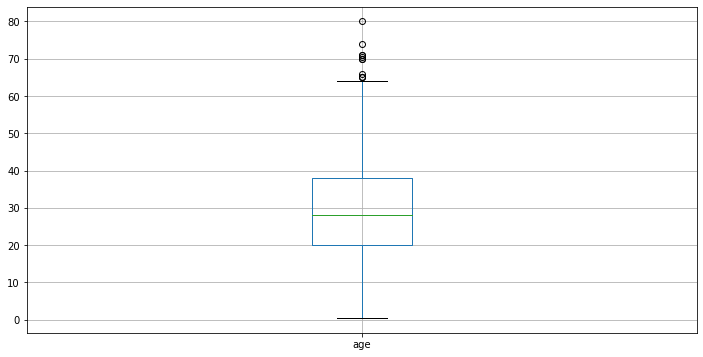

In [38]:
plt.figure(figsize = (12,6))
titanic.boxplot("age")
plt.show()

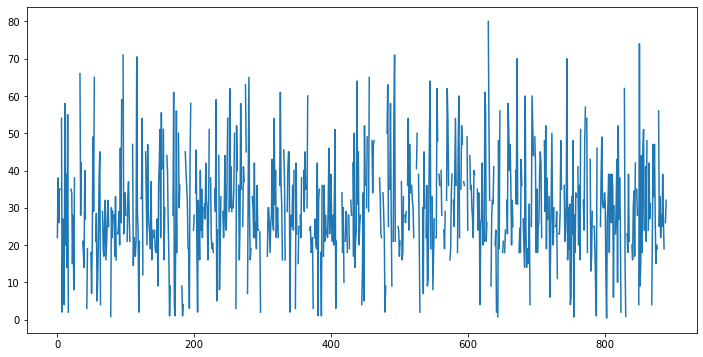

In [40]:
plt.figure(figsize = (12,6))
titanic.age.plot()
plt.show()

In [43]:
titanic.age.sort_values(ascending = False)

630    80.0
851    74.0
96     71.0
493    71.0
116    70.5
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: age, Length: 891, dtype: float64

In [44]:
titanic.loc[titanic.age > 90]

Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, deck]
Index: []

In [45]:
titanic.fare.sort_values(ascending = False)

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
         ...   
277      0.0000
633      0.0000
302      0.0000
597      0.0000
271      0.0000
Name: fare, Length: 891, dtype: float64

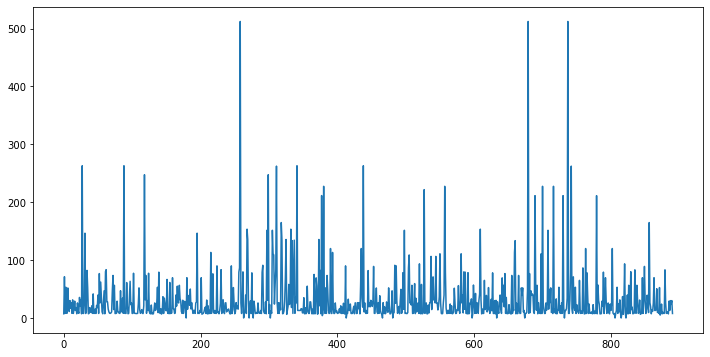

In [47]:
plt.figure(figsize = (12,6))
titanic.fare.plot()
plt.show()

### Handling / Removing Outliers

#### Titanic Dataset

In [3]:
titanic.head()

Survived  Class  Gender   Age  SipSp  ParCh      Fare Emb Deck
0        0      3    male  22.0      1      0     $7.25   S  NaN
1        1      1  female  38.0      1      0  $71.2833   C    C
2        1      3  female  26.0      0      0    $7.925   S  NaN
3        1      1  female  35.0      1      0     $53.1   S    C
4        0      3    male  35.0      0      0     $8.05   S  NaN

In [4]:
titanic.loc[titanic.Age > 90]

TypeError: '>' not supported between instances of 'str' and 'int'

In [5]:
index_outl  = titanic.loc[titanic.Age > 90].index

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
index_outl

In [ ]:
titanic.loc[titanic.Age > 90, "Age"] = titanic.loc[titanic.Age > 90, "Age"]/10

In [ ]:
titanic.loc[index_outl]

In [ ]:
titanic.loc[217, "Age"] = 42.0

In [ ]:
plt.figure(figsize = (12,6))
titanic.Age.plot()
plt.show()

In [ ]:
titanic.info()

### Categorical Data

#### Titanic Dataset

In [6]:
titanic.head()

Survived  Class  Gender   Age  SipSp  ParCh      Fare Emb Deck
0        0      3    male  22.0      1      0     $7.25   S  NaN
1        1      1  female  38.0      1      0  $71.2833   C    C
2        1      3  female  26.0      0      0    $7.925   S  NaN
3        1      1  female  35.0      1      0     $53.1   S    C
4        0      3    male  35.0      0      0     $8.05   S  NaN

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [ ]:
#titanic.to_csv("titanic_clean.csv", index = False)

In [8]:
titanic.nunique()

Survived      4
Class         3
Gender        2
Age          92
SipSp         7
ParCh         7
Fare        248
Emb           3
Deck          7
dtype: int64

In [9]:
titanic[["Gender", "Emb"]].describe()

Gender  Emb
count     894  892
unique      2    3
top      male    S
freq      580  647

In [10]:
titanic.Gender = titanic.Gender.astype("category")

In [11]:
titanic.Emb = titanic.Emb.astype("category")

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  894 non-null    object  
 1   Class     894 non-null    int64   
 2   Gender    894 non-null    category
 3   Age       758 non-null    object  
 4   SipSp     894 non-null    int64   
 5   ParCh     894 non-null    int64   
 6   Fare      894 non-null    object  
 7   Emb       892 non-null    category
 8   Deck      203 non-null    object  
dtypes: category(2), int64(3), object(4)
memory usage: 51.0+ KB


In [13]:
titanic.Gender.dtype

CategoricalDtype(categories=['female', 'male'], ordered=False)

#### Olympic Dataset

In [18]:
summer = pd.read_csv("summer.csv")

In [19]:
summer.head()

Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver

In [20]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [21]:
#summer.to_csv("summer_clean.csv", index = False)

In [22]:
summer.describe(include = ["O"])

City     Sport Discipline          Athlete Country Gender     Event  \
count    31165     31165      31165            31165   31161  31165     31165   
unique      22        43         67            22762     147      2       666   
top     London  Aquatics  Athletics  PHELPS, Michael     USA    Men  Football   
freq      3567      4170       3638               22    4585  22746      1497   

        Medal  
count   31165  
unique      3  
top      Gold  
freq    10486

In [23]:
summer.nunique()

Year             27
City             22
Sport            43
Discipline       67
Athlete       22762
Country         147
Gender            2
Event           666
Medal             3
dtype: int64

In [24]:
summer.City = summer.City.astype("category")

In [25]:
summer.Sport = summer.Sport.astype("category")

In [26]:
summer.Discipline = summer.Discipline.astype("category")

In [27]:
summer.Country = summer.Country.astype("category")

In [28]:
summer.Gender = summer.Gender.astype("category")

In [29]:
summer.Medal = summer.Medal.astype("category")

In [30]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Year        31165 non-null  int64   
 1   City        31165 non-null  category
 2   Sport       31165 non-null  category
 3   Discipline  31165 non-null  category
 4   Athlete     31165 non-null  object  
 5   Country     31161 non-null  category
 6   Gender      31165 non-null  category
 7   Event       31165 non-null  object  
 8   Medal       31165 non-null  category
dtypes: category(6), int64(1), object(2)
memory usage: 955.3+ KB


### Pandas Version 1.0: NEW Dtypes and pd.NA 

In [31]:
import pandas as pd

In [32]:
titanic = pd.read_csv("titanic.csv")

In [33]:
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked deck
0           0       3    male  22.0      1      0   7.2500        S  NaN
1           1       1  female  38.0      1      0  71.2833        C    C
2           1       3  female  26.0      0      0   7.9250        S  NaN
3           1       1  female  35.0      1      0  53.1000        S    C
4           0       3    male  35.0      0      0   8.0500        S  NaN
..        ...     ...     ...   ...    ...    ...      ...      ...  ...
886         0       2    male  27.0      0      0  13.0000        S  NaN
887         1       1  female  19.0      0      0  30.0000        S    B
888         0       3  female   NaN      1      2  23.4500        S  NaN
889         1       1    male  26.0      0      0  30.0000        C    C
890         0       3    male  32.0      0      0   7.7500        Q  NaN

[891 rows x 9 columns]

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [35]:
titanic = titanic.convert_dtypes()

In [36]:
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked  deck
0           0       3    male  22.0      1      0   7.2500        S  <NA>
1           1       1  female  38.0      1      0  71.2833        C     C
2           1       3  female  26.0      0      0   7.9250        S  <NA>
3           1       1  female  35.0      1      0  53.1000        S     C
4           0       3    male  35.0      0      0   8.0500        S  <NA>
..        ...     ...     ...   ...    ...    ...      ...      ...   ...
886         0       2    male  27.0      0      0  13.0000        S  <NA>
887         1       1  female  19.0      0      0  30.0000        S     B
888         0       3  female   NaN      1      2  23.4500        S  <NA>
889         1       1    male  26.0      0      0  30.0000        C     C
890         0       3    male  32.0      0      0   7.7500        Q  <NA>

[891 rows x 9 columns]

In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    Int64  
 1   pclass    891 non-null    Int64  
 2   sex       891 non-null    string 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    Int64  
 5   parch     891 non-null    Int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    string 
 8   deck      203 non-null    string 
dtypes: Int64(4), float64(2), string(3)
memory usage: 66.3 KB


In [38]:
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked  deck
0           0       3    male  22.0      1      0   7.2500        S  <NA>
1           1       1  female  38.0      1      0  71.2833        C     C
2           1       3  female  26.0      0      0   7.9250        S  <NA>
3           1       1  female  35.0      1      0  53.1000        S     C
4           0       3    male  35.0      0      0   8.0500        S  <NA>
..        ...     ...     ...   ...    ...    ...      ...      ...   ...
886         0       2    male  27.0      0      0  13.0000        S  <NA>
887         1       1  female  19.0      0      0  30.0000        S     B
888         0       3  female   NaN      1      2  23.4500        S  <NA>
889         1       1    male  26.0      0      0  30.0000        C     C
890         0       3    male  32.0      0      0   7.7500        Q  <NA>

[891 rows x 9 columns]

In [39]:
titanic.iloc[0, -1]

<NA>

In [40]:
type(titanic.iloc[0, -1])

pandas._libs.missing.NAType

In [41]:
pd.NA

<NA>